In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import re
import keras
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import cv2
import imutils
import pytesseract
%matplotlib inline

Using TensorFlow backend.


In [2]:
dataset_path = os.path.join('..', 'Dataset', 'captchas')
dataset_path

'..\\Dataset\\captchas'

In [19]:
def load_data(path):
    images = []
    output = []
    for i in tqdm(os.listdir(path)):
        
        if ('processing' in i):
            img_path = os.path.join(path, i)
            img = plt.imread(img_path)
            images.append(np.copy(img))
            label = i[: i.find('_')]
            output.append(label)
    return np.array(images), np.array(output)

In [20]:
images, output = load_data(dataset_path)

In [16]:
def clean_image(img):
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)[1]

    kernel = np.ones((2,1), np.uint8)

    img_erode = cv2.erode(thresh, kernel, iterations = 1)

    # contours = cv2.findContours(img_erode.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    #contours = cv2.findContours(img_erode.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    # contours = contours[0] if imutils.is_cv2() else contours[1]

    letter_image_regions = []

    output = img_erode.copy()
    plt.imshow(img_erode)
    for contour in contours:

        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) > 200:
            if w / h > 0.75:

                half_width = int(w / 2)
                cv2.rectangle(output, (x, y), (x + half_width, y + h), (10,0,10), 3)
                cv2.rectangle(output, (x, y), (x + w, y + h), (10,0,10), 3)
            else:
    
                cv2.rectangle(output, (x, y), (x + w, y + h), (10,0,10), 3)
                letter_image_regions.append((x, y))
    return output

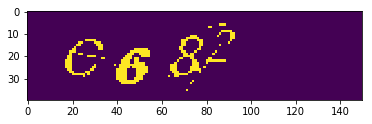

In [56]:
output = clean_image(images[0])

In [45]:
print(pytesseract.image_to_boxes(output))

o 17 10 34 27 0
r 25 0 45 38 0
e 44 7 55 23 0
o 64 7 93 34 0


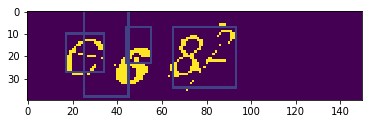

In [47]:
cv2.rectangle(output, (17, 10), (34, 27), 50)
cv2.rectangle(output, (25, 0), (45, 38), 50)
cv2.rectangle(output, (44, 7), (55, 23), 50)
cv2.rectangle(output, (65, 7), (93, 34), 50)
# cv2.rectangle(output, (80, 16), (93, 34), 50)
plt.imshow(output)

In [50]:
pytesseract.image_to_data(output, output_type= pytesseract.Output.DICT)

{'level': [1, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2],
 'left': [0, 17, 17, 17, 17, 44],
 'top': [0, 6, 6, 6, 2, 6],
 'width': [150, 76, 76, 76, 28, 49],
 'height': [40, 27, 27, 27, 38, 27],
 'conf': ['-1', '-1', '-1', '-1', 52, 20],
 'text': ['', '', '', '', 'or', 'eo']}

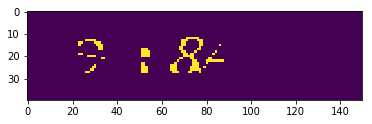

In [57]:
d = pytesseract.image_to_data(output, output_type= pytesseract.Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 10)

plt.imshow(output)
# cv2.waitKey(0)

In [12]:
img = []
for i in range(0, 150 - 15, 15):
    img.append(output[:, i : i + 15])
    

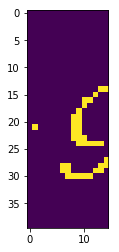

In [13]:
plt.imshow(img[5])

In [14]:
def display_image(images, size = 2):
     n = len(images)
     plt.figure()
     plt.gca().set_axis_off()
     im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
     for i in range(size)])
     plt.imshow(im)
     plt.show()


In [15]:
import pickle

In [16]:
model = pickle.load(open('Model.pkl', 'rb'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [17]:
model.predict(img[5])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (40, 15)